In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-28 23:23:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2020-05-28 23:23:41 (1.10 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


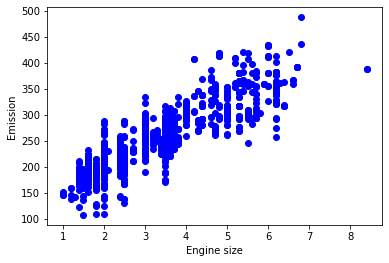

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)#Transform necessary to use multiple linReg process..?
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [21]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
#fitting is for getting coefficients/parameters of our model?
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficients:  [[ 0.         50.16795934 -1.5207963 ]]
Intercept:  [108.84046492]


Text(0, 0.5, 'Emission')

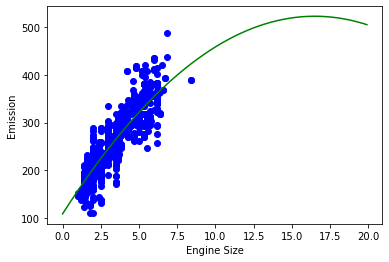

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 20.0, 0.1)#sets range of x-axis. 0.0 is starting, 20 is max, 0.1 is step
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
#yy is our polynomial equation. We can get individual coef and intercept 
plt.plot(XX,yy,'-g')#plot allows us to graph equations
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [34]:
from sklearn.metrics import r2_score
#using poly from polynomial features, a matrix??
test_x_poly = poly.fit_transform(test_x)#i guess like mulitple lin reg, so like entering multiple indepdent vars
test_y_ = clf.predict(test_x_poly)

print("Mean absoute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))# i guess r2 score calcualted based on actual vs predicted

Mean absoute error: 22.08
Residual sum of squares (MSE): 821.40
R2-score: 0.69


Coefficients:  [[ 0.         29.40452362  4.17314761 -0.47022932]]
Intercept:  [130.9815685]
Mean absolute error: 22.09
Residual sum of squares (MSE): 818.62
R2-score: 0.70


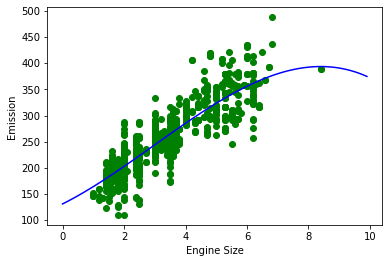

In [41]:
#With degree 3:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

#this is taking from train dataframe we previously defined to be 80% of the data
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#taking from test df 20% of the data
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 3)
#takes our x values and output a list of our data from power 0 to power 3
train_x_poly = poly.fit_transform(train_x)
train_x_poly
#Ok so this basically fits y = b + 0x + 0x^2 + 0x^3
#With fit_transform, we can say y = b +0x1 + 0x2 + 0x3, which is like multiple linReg!
#So now we go with the normal linreg stuff:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)#thing of train_x_poly as the multiple indepdent variable inputs
#train_y is just expected output.
#NOTE: train_x_poly is already an array, so it can be taken in as a parameter for fit
print("Coefficients: ", clf.coef_)
print("Intercept: ", clf.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)+clf.coef_[0][3]*np.power(XX,3)
plt.plot(XX,yy, '-b')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

test_x_poly = poly.fit_transform(test_x)#we input into prediction same way as we input into training
test_y_ = clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
#lol not really any better than degree = 2 polynomial